In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from datetime import datetime

##  Importation des données de Google Trends pour le mot-clé *debt*

In [103]:
## weekly debt_data research volume in the united states from 2004/01/04 to 2011/02/20
debt_data1 = pd.read_csv('debt_weekly1.csv', header=1, parse_dates=['Week'])
debt_data2 = pd.read_csv('debt_weekly2.csv', header=1, parse_dates=['Week'])

debt_data = debt_data1._append(debt_data2)

In [104]:
debt_data

,Week,Debt: (United States)
0,2004-01-04,94
1,2004-01-11,89
2,2004-01-18,89
3,2004-01-25,92
4,2004-02-01,90
...,...,...
158,2011-01-23,75
159,2011-01-30,70
160,2011-02-06,71
161,2011-02-13,77


## Trading signal generation

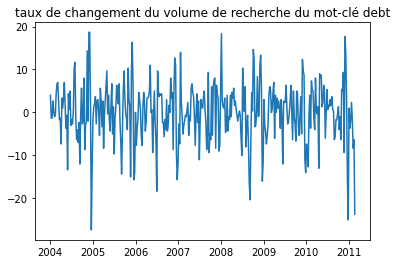

In [105]:
## specify the size of delta_t
delta_t = 3

## specify the data to use to generate trading signal
data_array = np.array(debt_data.iloc[:,-1])

## calcul du taux de changement selon delta_t

taux_de_changement_prev = np.zeros(len(data_array))
for i in range(delta_t):
    
    taux_de_changement_prev += np.roll(data_array, -i - 1)
    
taux_de_changement_prev /= delta_t

taux_de_changement = data_array - taux_de_changement_prev
    
plt.plot(debt_data['Week'], taux_de_changement)
plt.title("taux de changement du volume de recherche du mot-clé debt")
plt.savefig("taux_changement_2004_2011.png")


## Performance de l'indice DJIA entre le 5 Janvier 2004 et le 22 février 2011

[*********************100%%**********************]  1 of 1 completed


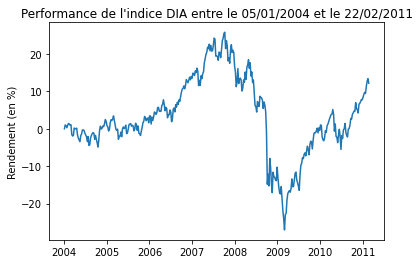

In [106]:
weekly_close = yf.download("DIA", start = datetime(2004,1,5), end = datetime(2011,2,22), interval = '1wk')['Close']
max_weekly_close = np.max(weekly_close)/100

normalized_weekly_close = (weekly_close - weekly_close.iloc[0])/max_weekly_close
plt.plot(normalized_weekly_close)
plt.title("Performance de l'indice DIA entre le 05/01/2004 et le 22/02/2011")
plt.ylabel("Rendement (en %)")
plt.savefig("DIA_2004_2011.png")

## Mise en oeuvre de la stratégie d'investissement

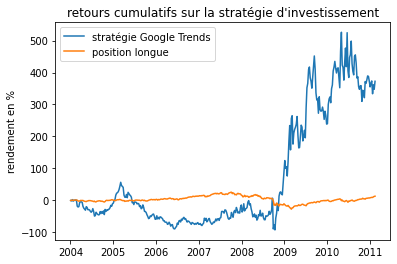

In [107]:
## initialize variables

return_val = np.zeros(len(data_array))
close_values =np.array(weekly_close)
return_val[0] = weekly_close.iloc[0]



## calcul du log retour sur investissement

log_return_val = np.zeros(len(data_array))
log_return_val[0] = 1.
weekly_return = np.zeros(len(data_array))

for i in range(len(close_values)-1):
    if i>0:
        if taux_de_changement[i-1] > 0:
            log_return_val[i] = (1 + log_return_val[i-1])*(1 + np.log(close_values[i+1]) - np.log(close_values[i])) - 1
            weekly_return[i] = np.log(close_values[i+1]) - np.log(close_values[i])
        else:
            log_return_val[i] = (1 + log_return_val[i-1])*(1 + np.log(close_values[i]) - np.log(close_values[i+1])) - 1
            weekly_return[i] = np.log(close_values[i]) - np.log(close_values[i+1])
            
retour = np.exp(log_return_val) - np.exp(1)

plt.plot(debt_data['Week'][:-1],retour[:-1]*100, label = "stratégie Google Trends")
plt.plot(debt_data['Week'][:-1], normalized_weekly_close[:-1], label = "position longue")
plt.legend()
plt.title("retours cumulatifs sur la stratégie d'investissement")
plt.ylabel("rendement en %")
plt.savefig("retours_2004_2011.png")

In [110]:
## rendement global de la stratégie
normalized_weekly_close[-2]
retour[-2]

/tmp/ipykernel_9225/3625456344.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_weekly_close[-2]


3.72568216977526

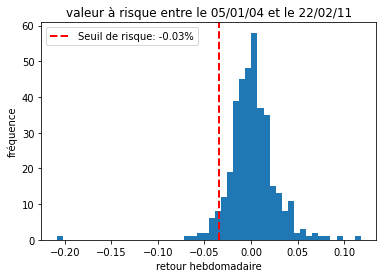

In [95]:
def historical_var(returns, confidence_level=0.95):
    """
    Calculate the historical Value at Risk (VaR) at a specified confidence level.

    Parameters:
    - returns: A pandas Series or numpy array of historical returns.
    - confidence_level: The confidence level (e.g., 0.95 for 95%).

    Returns:
    - The VaR at the specified confidence level, as a negative number.
    """
    
    # Calculate VaR
    var = np.percentile(returns, (1 - confidence_level) * 100)
    return var

VaR = historical_var(weekly_return, 0.95)

plt.hist(weekly_return, bins = 50)
plt.axvline(VaR, color='red', linestyle='dashed', linewidth=2, label=f'Seuil de risque: {VaR:.2f}%')
plt.xlabel("retour hebdomadaire")
plt.ylabel("fréquence")
plt.title("valeur à risque entre le 05/01/04 et le 22/02/11")
plt.legend()
plt.savefig("VaR_2004_2011.png")

#  À quel genre de performance arrive-t-on sur l'utilisation du mot-clé debt pendant les 5 dernières années?

In [96]:
## weekly debt_data research volume in the united states from 2004/01/04 to 2011/02/20
debt_data = pd.read_csv('debt_now.csv', header=1, parse_dates=['Week'])


In [97]:
debt_data

,Week,Debt: (United States)
0,2019-05-05,25
1,2019-05-12,25
2,2019-05-19,24
3,2019-05-26,22
4,2019-06-02,22
...,...,...
257,2024-04-07,35
258,2024-04-14,34
259,2024-04-21,32
260,2024-04-28,33


## Trading signal generation

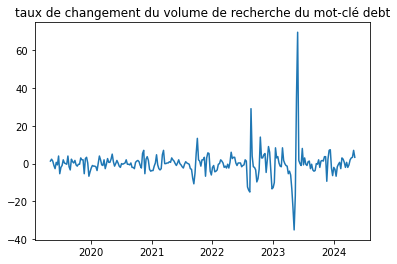

In [98]:
## specify the size of delta_t
delta_t = 3

## specify the data to use to generate trading signal
data_array = np.array(debt_data.iloc[:,-1])

## calcul du taux de changement selon delta_t

taux_de_changement_prev = np.zeros(len(data_array))
for i in range(delta_t):
    
    taux_de_changement_prev += np.roll(data_array, -i - 1)
    
taux_de_changement_prev /= delta_t

taux_de_changement = data_array - taux_de_changement_prev
    
plt.plot(debt_data['Week'], taux_de_changement)
plt.title("taux de changement du volume de recherche du mot-clé debt")
plt.savefig("taux_changement_2019_2024.png")

## Performance de l'indice DJIA entre le 5 Mai 2019 et le 5 mai 2024

[*********************100%%**********************]  1 of 1 completed


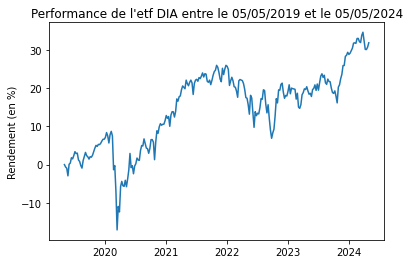

In [99]:
weekly_close = yf.download("DIA", start = datetime(2019,5,4), end = datetime(2024,5,5), interval = '1wk')['Close']
max_weekly_close = np.max(weekly_close)/100

normalized_weekly_close = (weekly_close - weekly_close.iloc[0])/max_weekly_close
plt.plot(normalized_weekly_close)
plt.title("Performance de l'etf DIA entre le 05/05/2019 et le 05/05/2024")
plt.ylabel("Rendement (en %)")
plt.savefig("DIA_2019_2024.png")

## Mise en oeuvre de la stratégie d'investissement

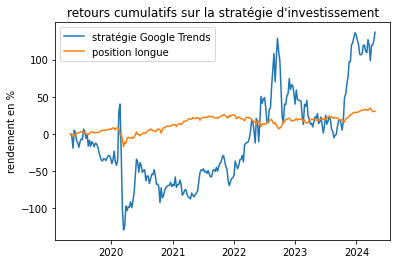

In [100]:
## initialize variables

return_val = np.zeros(len(data_array))
close_values =np.array(weekly_close)
return_val[0] = weekly_close.iloc[0]



## calcul du log retour sur investissement

log_return_val = np.zeros(len(data_array))
log_return_val[0] = 1.
weekly_return = np.zeros(len(data_array))

for i in range(len(close_values)-1):
    if i>0:
        if taux_de_changement[i-1] > 0:
            log_return_val[i] = (1 + log_return_val[i-1])*(1 + np.log(close_values[i+1]) - np.log(close_values[i])) - 1
            weekly_return[i] = np.log(close_values[i+1]) - np.log(close_values[i])
        else:
            log_return_val[i] = (1 + log_return_val[i-1])*(1 + np.log(close_values[i]) - np.log(close_values[i+1])) - 1
            weekly_return[i] = np.log(close_values[i]) - np.log(close_values[i+1])
            
retour = np.exp(log_return_val) - np.exp(1)

plt.plot(debt_data['Week'][:-2],retour[:-2]*100, label = "stratégie Google Trends")
plt.plot(debt_data['Week'][:-2], normalized_weekly_close[:-1], label = "position longue")
plt.legend()
plt.title("retours cumulatifs sur la stratégie d'investissement")
plt.ylabel("rendement en %")
plt.savefig("retours_2019_2024.png")

In [101]:
## rendement global de la stratégie
retour[-3]

1.366963962462456

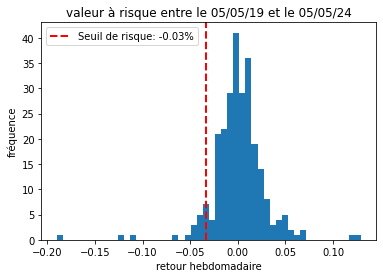

In [102]:
def historical_var(returns, confidence_level=0.95):
    """
    Calculate the historical Value at Risk (VaR) at a specified confidence level.

    Parameters:
    - returns: A pandas Series or numpy array of historical returns.
    - confidence_level: The confidence level (e.g., 0.95 for 95%).

    Returns:
    - The VaR at the specified confidence level, as a negative number.
    """
    
    # Calculate VaR
    var = np.percentile(returns, (1 - confidence_level) * 100)
    return var

VaR = historical_var(weekly_return, 0.95)

plt.hist(weekly_return, bins = 50)
plt.axvline(VaR, color='red', linestyle='dashed', linewidth=2, label=f'Seuil de risque: {VaR:.2f}%')
plt.xlabel("retour hebdomadaire")
plt.ylabel("fréquence")
plt.title("valeur à risque entre le 05/05/19 et le 05/05/24")
plt.legend()
plt.savefig("VaR_2019_2024.png")